<a href="https://colab.research.google.com/github/nileshrajpoot-2003/Duplicate-Question/blob/main/Duplicate_Question_Pairs_%7C_Quora_Question_Pairs_%7C_NLP_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/train1.csv",engine="python", on_bad_lines='warn')

In [ ]:
df.shape

(404290, 6)

In [ ]:
df

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0
...,...,...,...,...,...,...
404285,404285,433578,379845,How many keywords are there in the Racket prog...,How many keywords are there in PERL Programmin...,0
404286,404286,18840,155606,Do you believe there is life after death?,Is it true that there is life after death?,1
404287,404287,537928,537929,What is one coin?,What's this coin?,0
404288,404288,537930,537931,What is the approx annual cost of living while...,I am having little hairfall problem but I want...,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            404290 non-null  int64 
 1   qid1          404290 non-null  int64 
 2   qid2          404290 non-null  int64 
 3   question1     404289 non-null  object
 4   question2     404288 non-null  object
 5   is_duplicate  404290 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [ ]:
# duplicate rows
df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,1
question2,2
is_duplicate,0


is_duplicate
0    255027
1    149263
Name: count, dtype: int64
is_duplicate
0    63.080215
1    36.919785
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

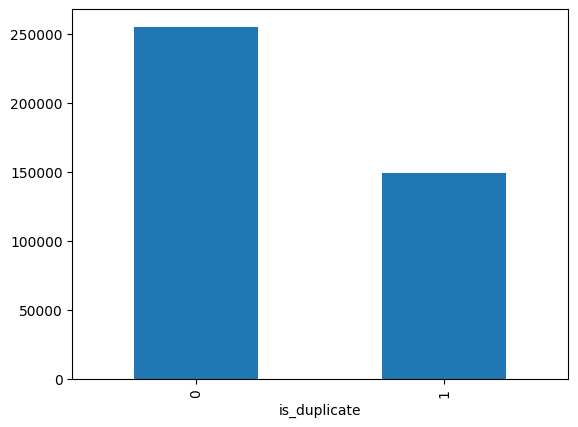

In [ ]:
#distribution of duplicate and non duplicate questions

print(df['is_duplicate'].value_counts())
print(df['is_duplicate'].value_counts()/df["is_duplicate"].count()*100)
df["is_duplicate"].value_counts().plot(kind="bar")

In [ ]:
#to check the repeated question
pid=pd.Series(df["qid1"].tolist()+df["qid2"].tolist())
print("no. of unique ques:",np.unique(pid).shape[0])
x=pid.value_counts()>1
print("no. of repeated ques:",x[x].shape[0])

no. of unique ques: 537933
no. of repeated ques: 111780


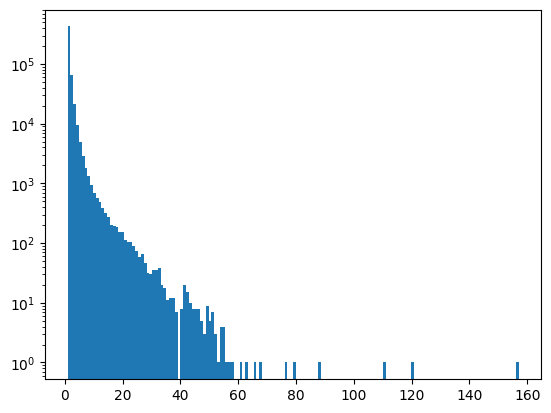

In [ ]:
#repeated ques histogram

plt.hist(pid.value_counts().values,bins=160)
plt.yscale("log")
plt.show()

In [ ]:
#for trainig take only 30000 rows
new_df=df.sample(30000)

In [ ]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate
26013,26013,26939,48460,How do I prepare for sat?,How do I prepare for the SAT and the JEE?,0
320387,320387,445936,445937,Where can I learn data warehousing?,What is the best way to learn data warehousing?,0
99633,99633,117372,165379,What are the most awaited Bollywood movies of ...,What are the upcoming Bollywood movies in 2016?,0
16953,16953,32271,32272,Where can I buy a tank of pure nitrogen gas?,What are the effects of bleach in gas tanks?,0
50755,50755,90121,90122,How should I start preparing for CLAT 2017?,How should I prepare for Clat 2017?,1
...,...,...,...,...,...,...
12488,12488,24057,24058,What is the best George Foreman Grill for a co...,How often should I clean my George Foreman grill?,0
103329,103329,170809,170810,Does anybody still use Microfiche?,What are digitized microfiche?,0
201126,201126,303061,303062,What are the chances of me becoming the next M...,Young Entrepreneurs: How can I be the next Mar...,1
168431,168431,18279,260906,What is the difference between the Torah and t...,Why is Islam and the Old Testament legal?,0


In [ ]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30000 entries, 26013 to 183473
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            30000 non-null  int64 
 1   qid1          30000 non-null  int64 
 2   qid2          30000 non-null  int64 
 3   question1     30000 non-null  object
 4   question2     30000 non-null  object
 5   is_duplicate  30000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 1.6+ MB


In [ ]:
new_df.isnull().sum()

,0
id,0
qid1,0
qid2,0
question1,0
question2,0
is_duplicate,0


In [ ]:
new_df.duplicated().sum()

np.int64(0)

In [ ]:
ques_df=new_df[['question1','question2']]
ques_df.head()

,question1,question2
26013,How do I prepare for sat?,How do I prepare for the SAT and the JEE?
320387,Where can I learn data warehousing?,What is the best way to learn data warehousing?
99633,What are the most awaited Bollywood movies of ...,What are the upcoming Bollywood movies in 2016?
16953,Where can I buy a tank of pure nitrogen gas?,What are the effects of bleach in gas tanks?
50755,How should I start preparing for CLAT 2017?,How should I prepare for Clat 2017?


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
questions = list(ques_df['question1']) + list(ques_df['question2'])

cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(questions).toarray(),2)

In [ ]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [ ]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
26013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
320387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201126,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
168431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
temp_df['is_duplicate']=new_df['is_duplicate']

In [ ]:
temp_df

,0,1,2,3,4,5,6,7,8,9,...,2991,2992,2993,2994,2995,2996,2997,2998,2999,is_duplicate
26013,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
320387,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
99633,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16953,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
50755,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12488,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
103329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
201126,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,1
168431,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#train a model
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(temp_df.iloc[:,0:-1].values,temp_df.iloc[:,-1].values,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred=rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.7503333333333333

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train)
y_pred=xgb.predict(X_test)
accuracy_score(y_test,y_pred)

0.7241666666666666

In [ ]:
new_df

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
26013,26013,26939,48460,How do I prepare for sat?,How do I prepare for the SAT and the JEE?,0,25,41,6,10,5
320387,320387,445936,445937,Where can I learn data warehousing?,What is the best way to learn data warehousing?,0,35,47,6,9,3
99633,99633,117372,165379,What are the most awaited Bollywood movies of ...,What are the upcoming Bollywood movies in 2016?,0,51,47,9,8,6
16953,16953,32271,32272,Where can I buy a tank of pure nitrogen gas?,What are the effects of bleach in gas tanks?,0,44,44,10,9,1
50755,50755,90121,90122,How should I start preparing for CLAT 2017?,How should I prepare for Clat 2017?,1,43,35,8,7,6
...,...,...,...,...,...,...,...,...,...,...,...
12488,12488,24057,24058,What is the best George Foreman Grill for a co...,How often should I clean my George Foreman grill?,0,60,49,11,9,2
103329,103329,170809,170810,Does anybody still use Microfiche?,What are digitized microfiche?,0,34,30,5,4,1
201126,201126,303061,303062,What are the chances of me becoming the next M...,Young Entrepreneurs: How can I be the next Mar...,1,61,59,11,10,4
168431,168431,18279,260906,What is the difference between the Torah and t...,Why is Islam and the Old Testament legal?,0,63,41,11,8,4


is_duplicate
0    18922
1    11078
Name: count, dtype: int64
is_duplicate
0    63.073333
1    36.926667
Name: count, dtype: float64


<Axes: xlabel='is_duplicate'>

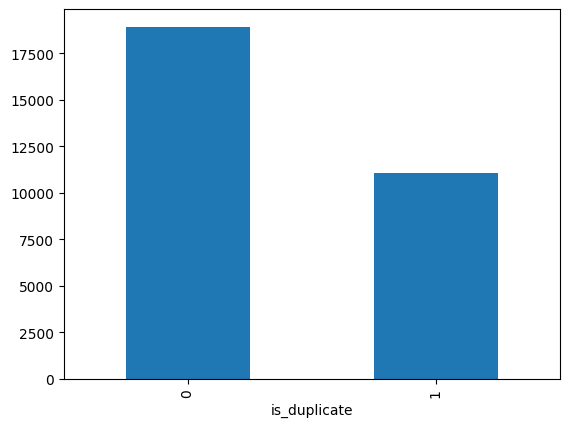

In [ ]:
# distribution of duplicate and non duplicte ques
print(new_df['is_duplicate'].value_counts())
print(new_df['is_duplicate'].value_counts()/new_df["is_duplicate"].count()*100)
new_df["is_duplicate"].value_counts().plot(kind="bar")

In [ ]:
#repeated question
qid=pd.Series(new_df["qid1"].tolist()+new_df["qid2"].tolist())
print("no. of unique ques:",np.unique(qid).shape[0])
x1=qid.value_counts()>1
print("no. of repeated ques:",x1[x1].shape[0])

no. of unique ques: 55234
no. of repeated ques: 3541


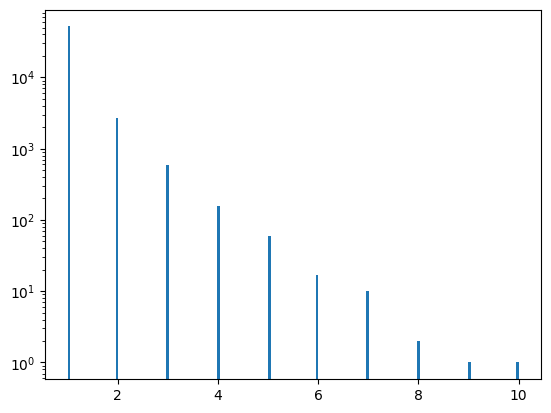

In [ ]:
plt.hist(qid.value_counts().values,bins=160)
plt.yscale("log")
plt.show()

FEATURE ENGINERRING

In [ ]:
# obtain lenth of q1 and q2
new_df["q1_len"]=new_df["question1"].str.len()
new_df["q2_len"]=new_df["question2"].str.len()

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
26013,26013,26939,48460,How do I prepare for sat?,How do I prepare for the SAT and the JEE?,0,25,41,6,10,5
320387,320387,445936,445937,Where can I learn data warehousing?,What is the best way to learn data warehousing?,0,35,47,6,9,3
99633,99633,117372,165379,What are the most awaited Bollywood movies of ...,What are the upcoming Bollywood movies in 2016?,0,51,47,9,8,6
16953,16953,32271,32272,Where can I buy a tank of pure nitrogen gas?,What are the effects of bleach in gas tanks?,0,44,44,10,9,1
50755,50755,90121,90122,How should I start preparing for CLAT 2017?,How should I prepare for Clat 2017?,1,43,35,8,7,6


In [ ]:
#obtain no. of word in q1 and q2
new_df["q1_num_words"]=new_df["question1"].apply(lambda row: len(row.split(" ")))
new_df["q2_num_words"]=new_df["question2"].apply(lambda row: len(row.split(" ")))
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
26013,26013,26939,48460,How do I prepare for sat?,How do I prepare for the SAT and the JEE?,0,25,41,6,10,5
320387,320387,445936,445937,Where can I learn data warehousing?,What is the best way to learn data warehousing?,0,35,47,6,9,3
99633,99633,117372,165379,What are the most awaited Bollywood movies of ...,What are the upcoming Bollywood movies in 2016?,0,51,47,9,8,6
16953,16953,32271,32272,Where can I buy a tank of pure nitrogen gas?,What are the effects of bleach in gas tanks?,0,44,44,10,9,1
50755,50755,90121,90122,How should I start preparing for CLAT 2017?,How should I prepare for Clat 2017?,1,43,35,8,7,6


In [ ]:
def common_word(row):
  w1=set(map(lambda word:word.lower().strip(),row["question1"].split(" ")))
  w2=set(map(lambda word:word.lower().strip(),row["question2"].split(" ")))
  return len(w1&w2)

In [ ]:
#common word from q1 and q2
new_df["word_common"]=new_df.apply(common_word,axis=1)

In [ ]:
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common
26013,26013,26939,48460,How do I prepare for sat?,How do I prepare for the SAT and the JEE?,0,25,41,6,10,5
320387,320387,445936,445937,Where can I learn data warehousing?,What is the best way to learn data warehousing?,0,35,47,6,9,3
99633,99633,117372,165379,What are the most awaited Bollywood movies of ...,What are the upcoming Bollywood movies in 2016?,0,51,47,9,8,6
16953,16953,32271,32272,Where can I buy a tank of pure nitrogen gas?,What are the effects of bleach in gas tanks?,0,44,44,10,9,1
50755,50755,90121,90122,How should I start preparing for CLAT 2017?,How should I prepare for Clat 2017?,1,43,35,8,7,6


In [ ]:
#total common word in q1 and q2
def total_word(row):
  w1=set(map(lambda word:word.lower().strip(),row["question1"].split(" ")))
  w2=set(map(lambda word:word.lower().strip(),row["question2"].split(" ")))
  return (len(w1)+len(w2))

In [ ]:
new_df["total_word"]=new_df.apply(total_word,axis=1)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_word
26013,26013,26939,48460,How do I prepare for sat?,How do I prepare for the SAT and the JEE?,0,25,41,6,10,5,15
320387,320387,445936,445937,Where can I learn data warehousing?,What is the best way to learn data warehousing?,0,35,47,6,9,3,15
99633,99633,117372,165379,What are the most awaited Bollywood movies of ...,What are the upcoming Bollywood movies in 2016?,0,51,47,9,8,6,17
16953,16953,32271,32272,Where can I buy a tank of pure nitrogen gas?,What are the effects of bleach in gas tanks?,0,44,44,10,9,1,19
50755,50755,90121,90122,How should I start preparing for CLAT 2017?,How should I prepare for Clat 2017?,1,43,35,8,7,6,15


In [ ]:
#common word sharing in q1 and q2
new_df["word_share"]=round(new_df["word_common"]/new_df["total_word"],2)
new_df.head()

,id,qid1,qid2,question1,question2,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_word,word_share
26013,26013,26939,48460,How do I prepare for sat?,How do I prepare for the SAT and the JEE?,0,25,41,6,10,5,15,0.33
320387,320387,445936,445937,Where can I learn data warehousing?,What is the best way to learn data warehousing?,0,35,47,6,9,3,15,0.20
99633,99633,117372,165379,What are the most awaited Bollywood movies of ...,What are the upcoming Bollywood movies in 2016?,0,51,47,9,8,6,17,0.35
16953,16953,32271,32272,Where can I buy a tank of pure nitrogen gas?,What are the effects of bleach in gas tanks?,0,44,44,10,9,1,19,0.05
50755,50755,90121,90122,How should I start preparing for CLAT 2017?,How should I prepare for Clat 2017?,1,43,35,8,7,6,15,0.40


max characters: 332
min characters: 1
avg characters: 59


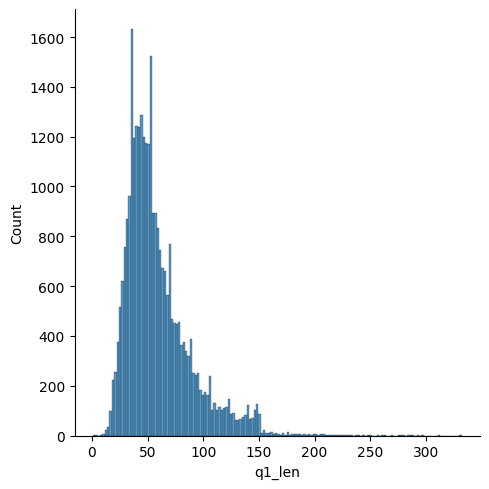

In [ ]:
#analysis of feature
sns.displot(new_df["q1_len"])
print("max characters:",new_df["q1_len"].max())
print("min characters:",new_df["q1_len"].min())
print("avg characters:",int(new_df["q1_len"].mean()))

max characters: 589
min characters: 6
avg characters: 59


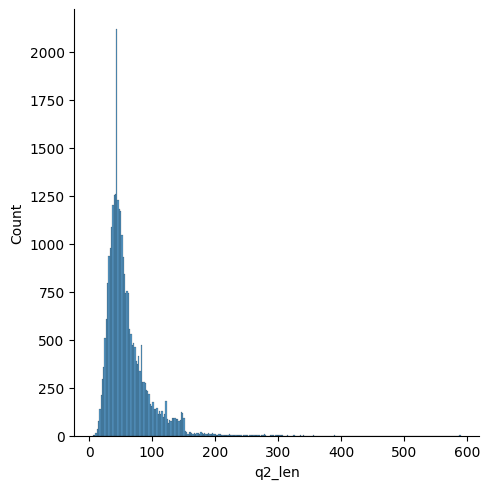

In [ ]:
sns.displot(new_df["q2_len"])
print("max characters:",new_df["q2_len"].max())
print("min characters:",new_df["q2_len"].min())
print("avg characters:",int(new_df["q2_len"].mean()))

max characters: 65
min characters: 1
avg characters: 10


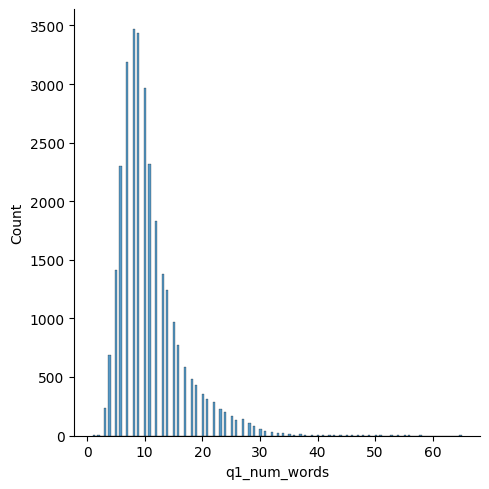

In [ ]:
sns.displot(new_df["q1_num_words"])
print("max characters:",new_df["q1_num_words"].max())
print("min characters:",new_df["q1_num_words"].min())
print("avg characters:",int(new_df["q1_num_words"].mean()))

max characters: 112
min characters: 1
avg characters: 11


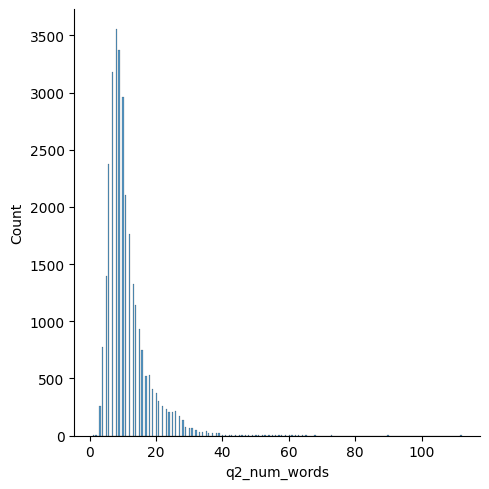

In [ ]:
sns.displot(new_df["q2_num_words"])
print("max characters:",new_df["q2_num_words"].max())
print("min characters:",new_df["q2_num_words"].min())
print("avg characters:",int(new_df["q2_num_words"].mean()))

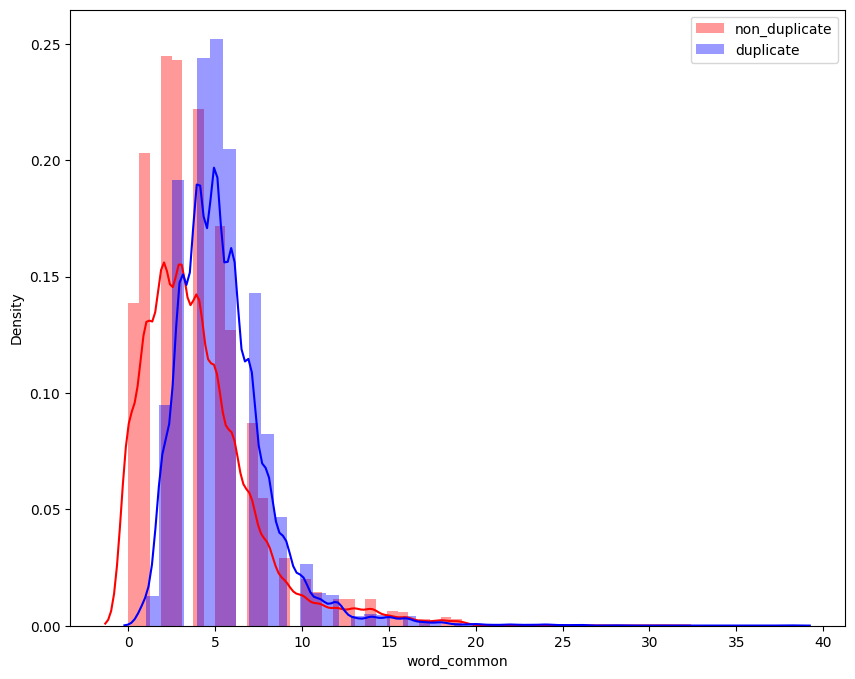

In [ ]:
#common words
import warnings
warnings.filterwarnings("ignore")
plt.figure(figsize=(10,8))
sns.distplot(new_df[new_df["is_duplicate"]==0]["word_common"],label="non_duplicate",color="red")
sns.distplot(new_df[new_df["is_duplicate"]==1]["word_common"],label="duplicate",color="blue")
plt.legend()
plt.show()

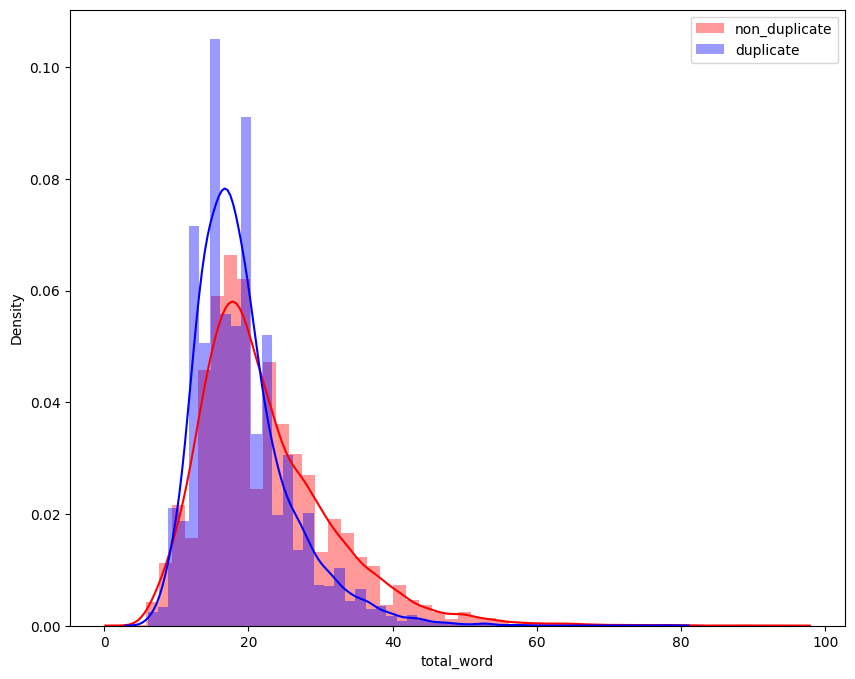

In [ ]:
#total word
plt.figure(figsize=(10,8))
sns.distplot(new_df[new_df["is_duplicate"]==0]["total_word"],label="non_duplicate",color="red")
sns.distplot(new_df[new_df["is_duplicate"]==1]["total_word"],label="duplicate",color="blue")
plt.legend()
plt.show()

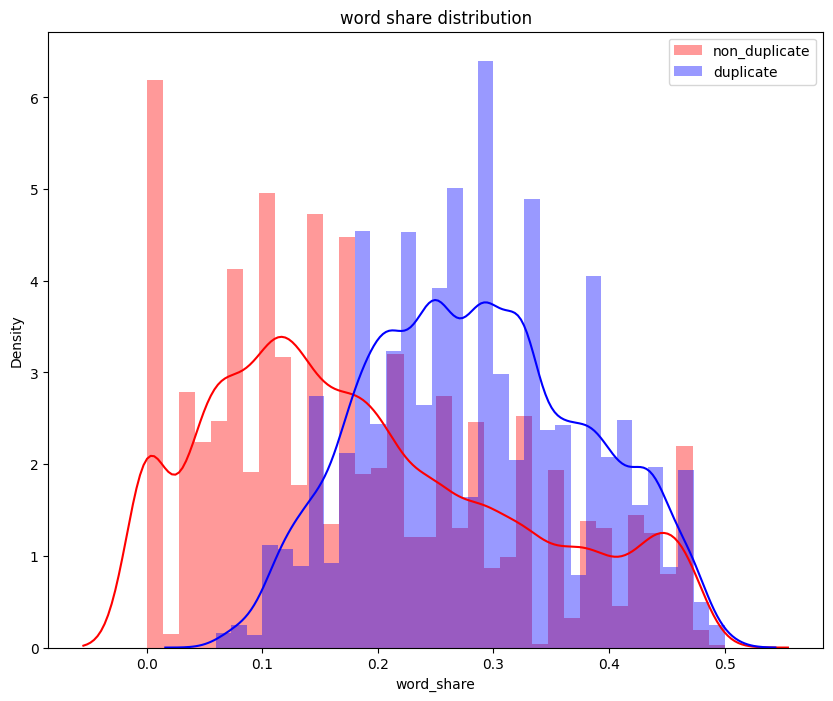

In [ ]:
#word share
plt.figure(figsize=(10,8))
sns.distplot(new_df[new_df["is_duplicate"]==0]["word_share"],label="non_duplicate",color="red")
sns.distplot(new_df[new_df["is_duplicate"]==1]["word_share"],label="duplicate",color="blue")
plt.legend()
plt.title("word share distribution")
plt.show()

In [ ]:
ques_df=new_df[["question1","question2"]]
ques_df.head()

,question1,question2
26013,How do I prepare for sat?,How do I prepare for the SAT and the JEE?
320387,Where can I learn data warehousing?,What is the best way to learn data warehousing?
99633,What are the most awaited Bollywood movies of ...,What are the upcoming Bollywood movies in 2016?
16953,Where can I buy a tank of pure nitrogen gas?,What are the effects of bleach in gas tanks?
50755,How should I start preparing for CLAT 2017?,How should I prepare for Clat 2017?


In [ ]:
final_df=new_df.drop(columns=["id","qid1","qid2","question1","question2"])
print(final_df.shape)
final_df.head()

(30000, 8)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_word,word_share
26013,0,25,41,6,10,5,15,0.33
320387,0,35,47,6,9,3,15,0.20
99633,0,51,47,9,8,6,17,0.35
16953,0,44,44,10,9,1,19,0.05
50755,1,43,35,8,7,6,15,0.40


In [ ]:
#apply bag of word
from sklearn.feature_extraction.text import CountVectorizer
# merge texts
question=list(ques_df["question1"])+list(ques_df["question2"])

cv=CountVectorizer(max_features=3000)
q1_arr,q2_arr=np.vsplit(cv.fit_transform(question).toarray(),2)


In [ ]:
temp_df1=pd.DataFrame(q1_arr,index=ques_df.index)
temp_df2=pd.DataFrame(q2_arr,index=ques_df.index)
temp_df=pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(30000, 6000)

In [ ]:
final_df=pd.concat([final_df,temp_df],axis=1)
print(final_df.shape)
final_df.head()

(30000, 6008)


,is_duplicate,q1_len,q2_len,q1_num_words,q2_num_words,word_common,total_word,word_share,0,1,...,2990,2991,2992,2993,2994,2995,2996,2997,2998,2999
26013,0,25,41,6,10,5,15,0.33,0,0,...,0,0,0,0,0,0,0,0,0,0
320387,0,35,47,6,9,3,15,0.20,0,0,...,0,0,0,0,0,0,0,0,0,0
99633,0,51,47,9,8,6,17,0.35,0,0,...,0,0,0,0,0,0,0,0,0,0
16953,0,44,44,10,9,1,19,0.05,0,0,...,0,0,0,0,0,0,0,0,0,0
50755,1,43,35,8,7,6,15,0.40,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train1,X_test1,y_train1,y_test1=train_test_split(final_df.iloc[:,1:].values,final_df.iloc[:,0].values,test_size=0.2,random_state=1)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf=RandomForestClassifier()
rf.fit(X_train1,y_train1)
y_pred1=rf.predict(X_test1)
accuracy_score(y_test1,y_pred1)


0.7646666666666667

In [ ]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train1,y_train1)
y_pred1=xgb.predict(X_test1)
accuracy_score(y_test1,y_pred1)

0.764